In [13]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import torch
import keras
from sklearn.datasets import load_iris

import numpy as np
import matplotlib.pyplot as plt

current_device = torch.cuda.current_device()
print(torch.cuda.get_device_name(current_device))

NVIDIA GeForce GTX 960


In [14]:
iris = load_iris()
data = iris["data"]
target = iris["target"]
target_names = iris["target_names"]

X = data[:, (0, 1, 2)] #sepal length, sepal width, petal length
Y = data[:, 3] # petal width
Z = target # species

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 3)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 16 (Dense)          │ (None, 16)        │         64 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 32 (Dense)          │ (None, 32)        │        544 │ 16[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cont_out (Dense)    │ (None, 1)         │         33 │ 32[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cat_out (Dense)     │ (None, 3)         │         99 │ 32[0][0]          │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 740 (2.89 KB)

 Trainable params: 740 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

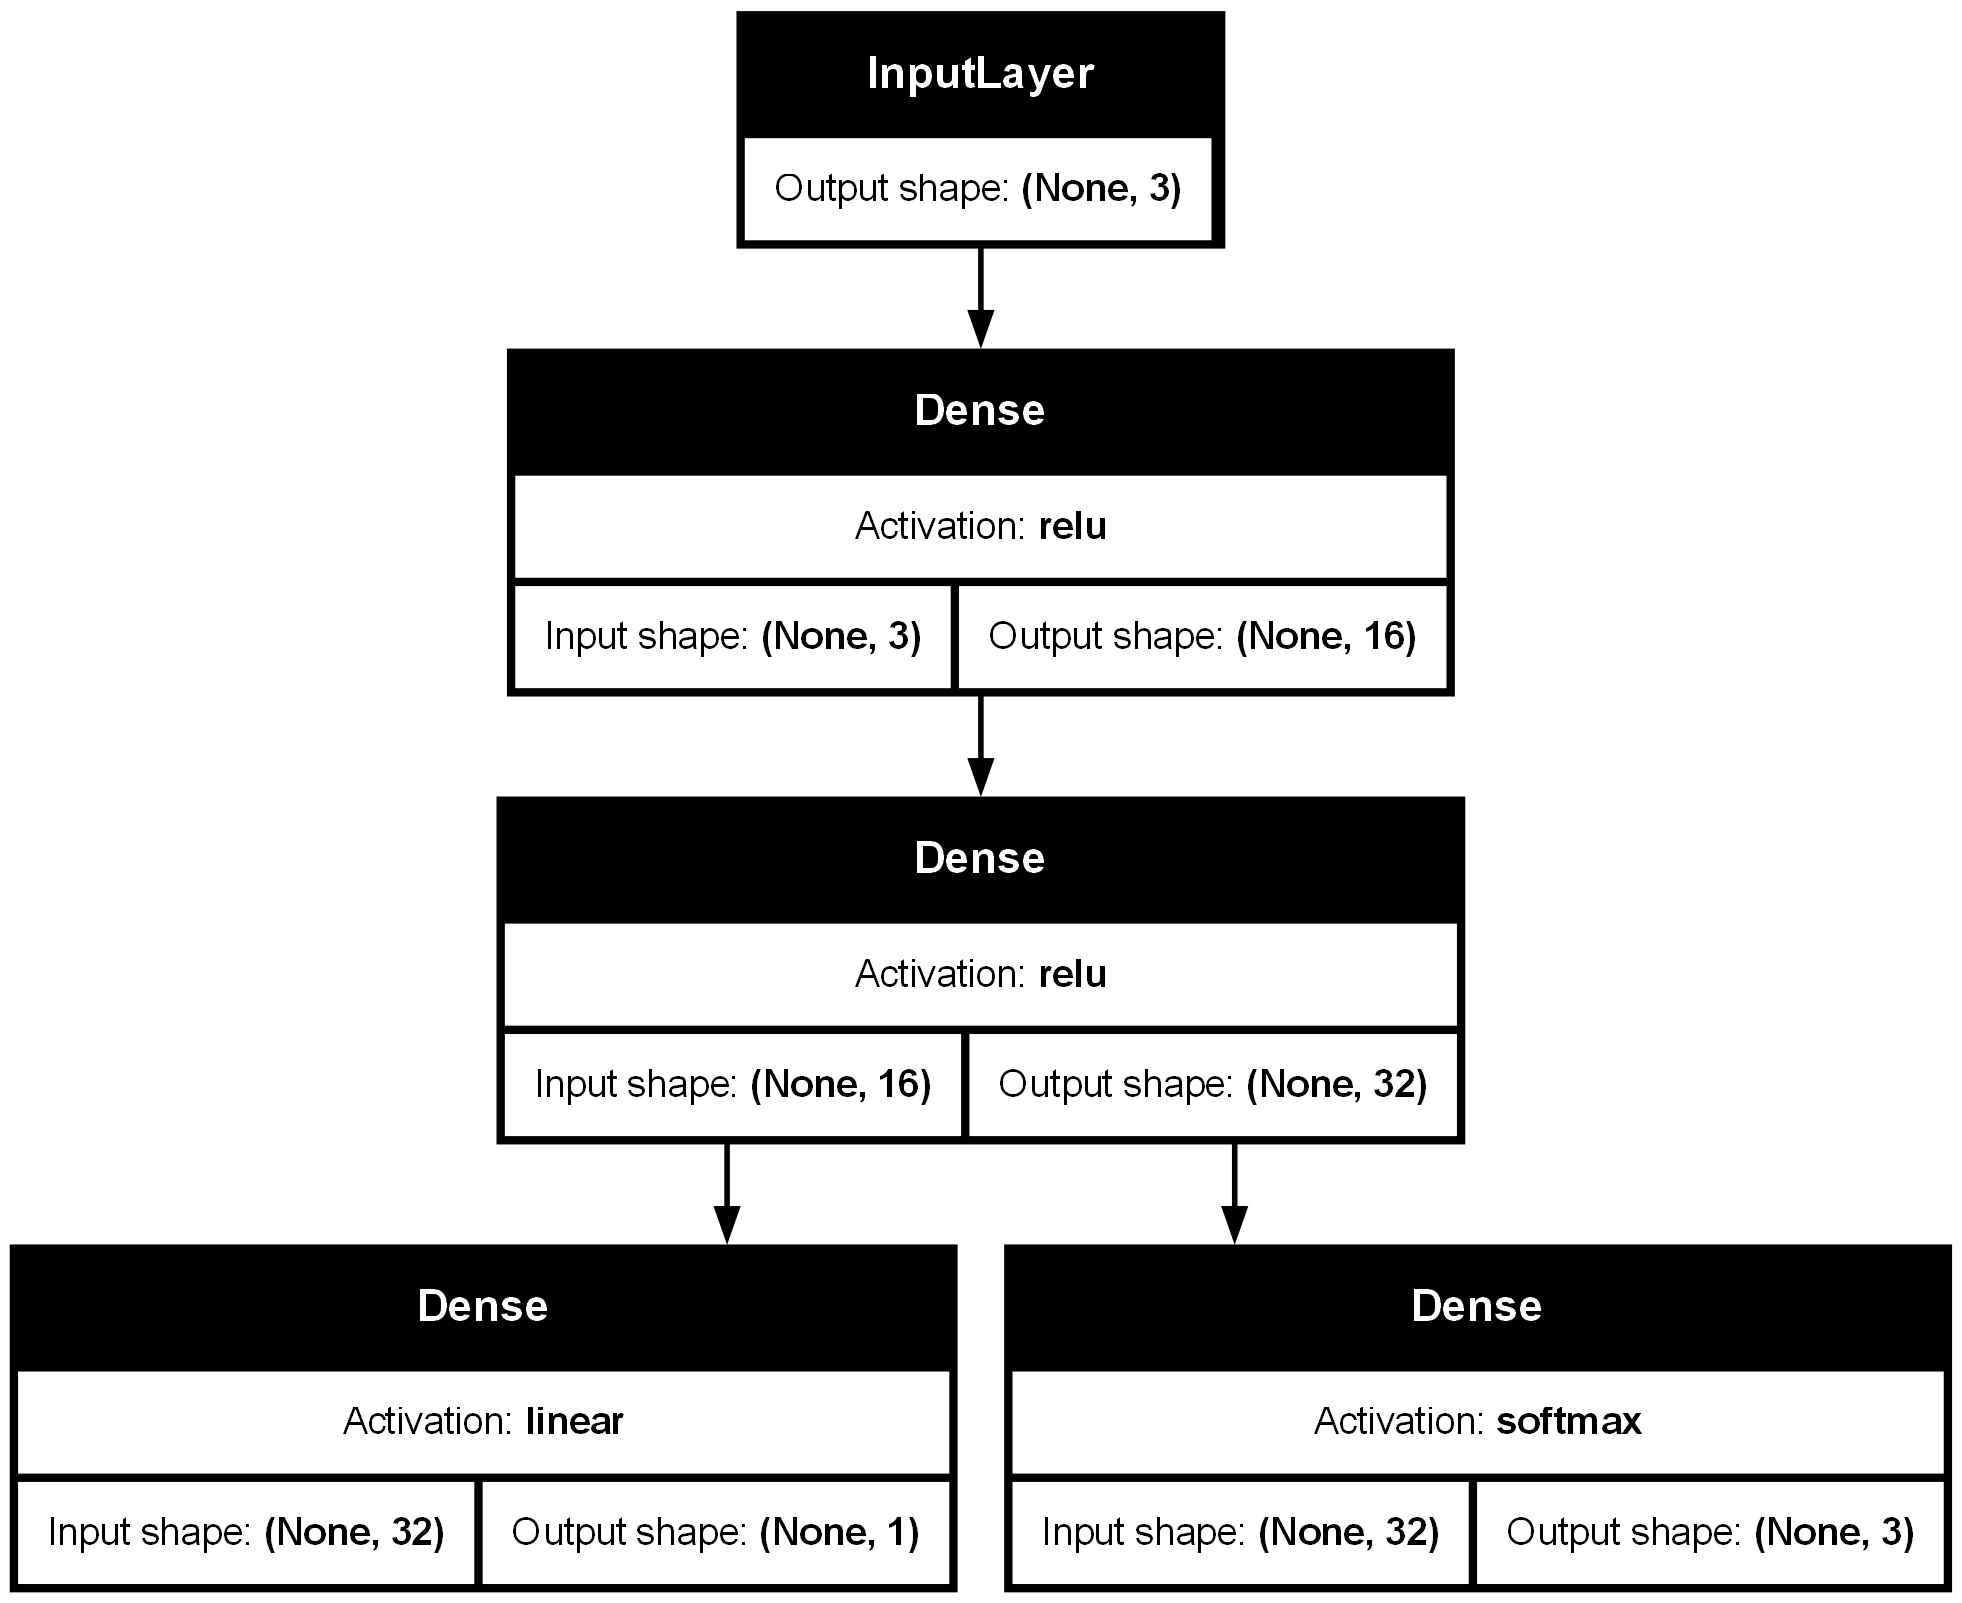

In [15]:
inputs = keras.Input(shape=(3,), name='input')
x = keras.layers.Dense(16, activation='relu', name='16')(inputs)
x = keras.layers.Dense(32, activation='relu', name='32')(x)
output1 = keras.layers.Dense(1, name='cont_out')(x)
output2 = keras.layers.Dense(3, activation='softmax', name='cat_out')(x)

model = keras.Model(inputs=inputs, outputs=[output1, output2])

model.compile(loss={'cont_out': 'mean_absolute_error', 
                    'cat_out': 'sparse_categorical_crossentropy'},
              optimizer='adam',
              metrics={'cat_out': keras.metrics.SparseCategoricalAccuracy(name='acc')})

model.summary()
keras.utils.plot_model(model, "models/model_test.png", show_shapes=True, show_layer_activations=True)

In [16]:
history = model.fit(X, {'cont_out': Y, 'cat_out': Z}, epochs=15, validation_split=0.1, batch_size=8)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - cat_out_acc: 0.6362 - cat_out_loss: 1.0025 - cont_out_loss: 1.7376 - loss: 2.7402 - val_cat_out_acc: 0.0000e+00 - val_cat_out_loss: 1.4210 - val_cont_out_loss: 1.2436 - val_loss: 2.6646
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - cat_out_acc: 0.5694 - cat_out_loss: 0.9476 - cont_out_loss: 0.3918 - loss: 1.3394 - val_cat_out_acc: 0.7333 - val_cat_out_loss: 0.8806 - val_cont_out_loss: 0.2910 - val_loss: 1.1716
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - cat_out_acc: 0.6901 - cat_out_loss: 0.8638 - cont_out_loss: 0.3150 - loss: 1.1788 - val_cat_out_acc: 1.0000 - val_cat_out_loss: 0.7881 - val_cont_out_loss: 0.7014 - val_loss: 1.4895
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - cat_out_acc: 0.7300 - cat_out_loss: 0.8110 - cont_out_loss: 0.2570 - loss: 1.0679 - val_cat_out_acc: 0.0000e+00 - val_cat_out_loss: 0.9915 - val_cont_out_loss: 0.6382 - val_loss: 1.6297
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step -

In [17]:
print(history.history.keys())

dict_keys(['cat_out_acc', 'cat_out_loss', 'cont_out_loss', 'loss', 'val_cat_out_acc', 'val_cat_out_loss', 'val_cont_out_loss', 'val_loss'])


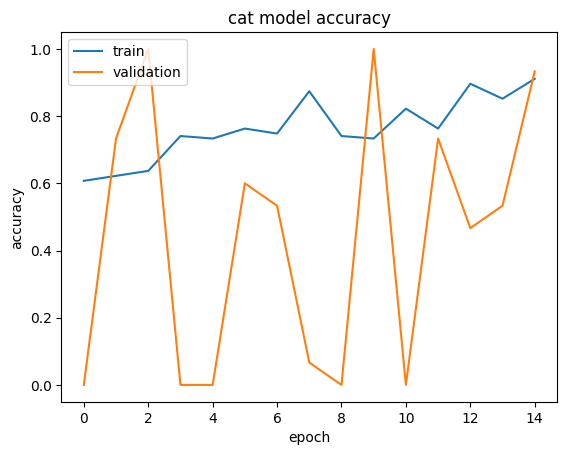

In [18]:
plt.plot(history.history['cat_out_acc'])
plt.plot(history.history['val_cat_out_acc'])
plt.title('cat model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

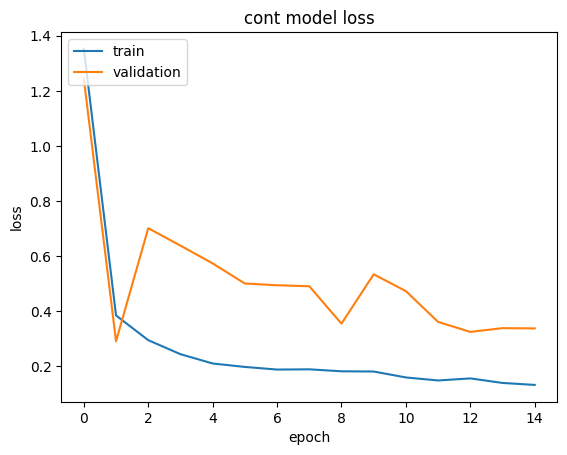

In [19]:
plt.plot(history.history['cont_out_loss'])
plt.plot(history.history['val_cont_out_loss'])
plt.title('cont model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

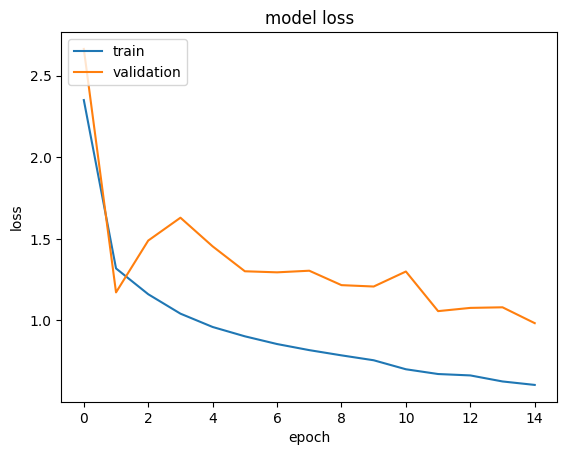

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
preds = model.predict(np.array([[7.2, 3.1, 5.8], [4.9, 2.7, 1.3]])) #data of a fairly typical I. virginica & I. setosa
print(preds)

pedal_width = preds[0] #should be approximtaley 2 & 0.3
class_type = np.argmax(preds[1], axis=1) #should be class 2 & 0
class_names = [target_names[ct] for ct in class_type]

print(f"pedal_width = {pedal_width} / class_type = {class_type} --> class_name {class_names}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[array([[1.9529072 ],
       [0.20404162]], dtype=float32), array([[0.00786996, 0.45674977, 0.5353802 ],
       [0.7063498 , 0.22283661, 0.07081361]], dtype=float32)]
pedal_width = [[1.9529072 ]
 [0.20404162]] / class_type = [2 0] --> class_name [np.str_('virginica'), np.str_('setosa')]
